In [24]:
%%bash
#strace -f -tt -T -r -y -o logs/view3.st python src/mmarrays.py 100000
strace -f -tt -T -r -y -o logs/view3.st python src/multi_threaded.py

In [25]:
from strace_miner.views.v3 import IOMinerV3
from strace_miner.views.v3 import IOLineReaderV3

In [26]:
io_calls = ['read','write']
line_reader = IOLineReaderV3(['/workspaces/',],collapse=False)
#line_reader = IOLineReaderV3(collapse=False)
sta = IOMinerV3(["logs/view3.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/view3.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [27]:
sta.activities_summary['view3']

,call,duration,percent
0,"[read, [<4KB], /dev/urandom]",0.000124,0.021717
1,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000297,0.052016
2,"[read, [<4KB], /opt/conda]",0.007632,1.336654
3,"[read, [<4KB], /workspaces/hdf5-tutorial.../mu...",0.000066,0.011559
4,"[read, [<4MB], /etc/locale.alias]",0.000069,0.012085
5,"[read, [<4MB], /opt/conda]",0.006267,1.097590
6,"[read, [<4MB], /usr/share]",0.000214,0.037480
7,"[read, [<4MB], /workspaces/hdf5-tutorial.../mu...",0.000127,0.022243
8,"[write, [<4KB], /workspaces/hdf5-tutorial.../m...",0.001539,0.269538
9,"[write, [<4MB], /workspaces/hdf5-tutorial.../m...",0.005183,0.907741


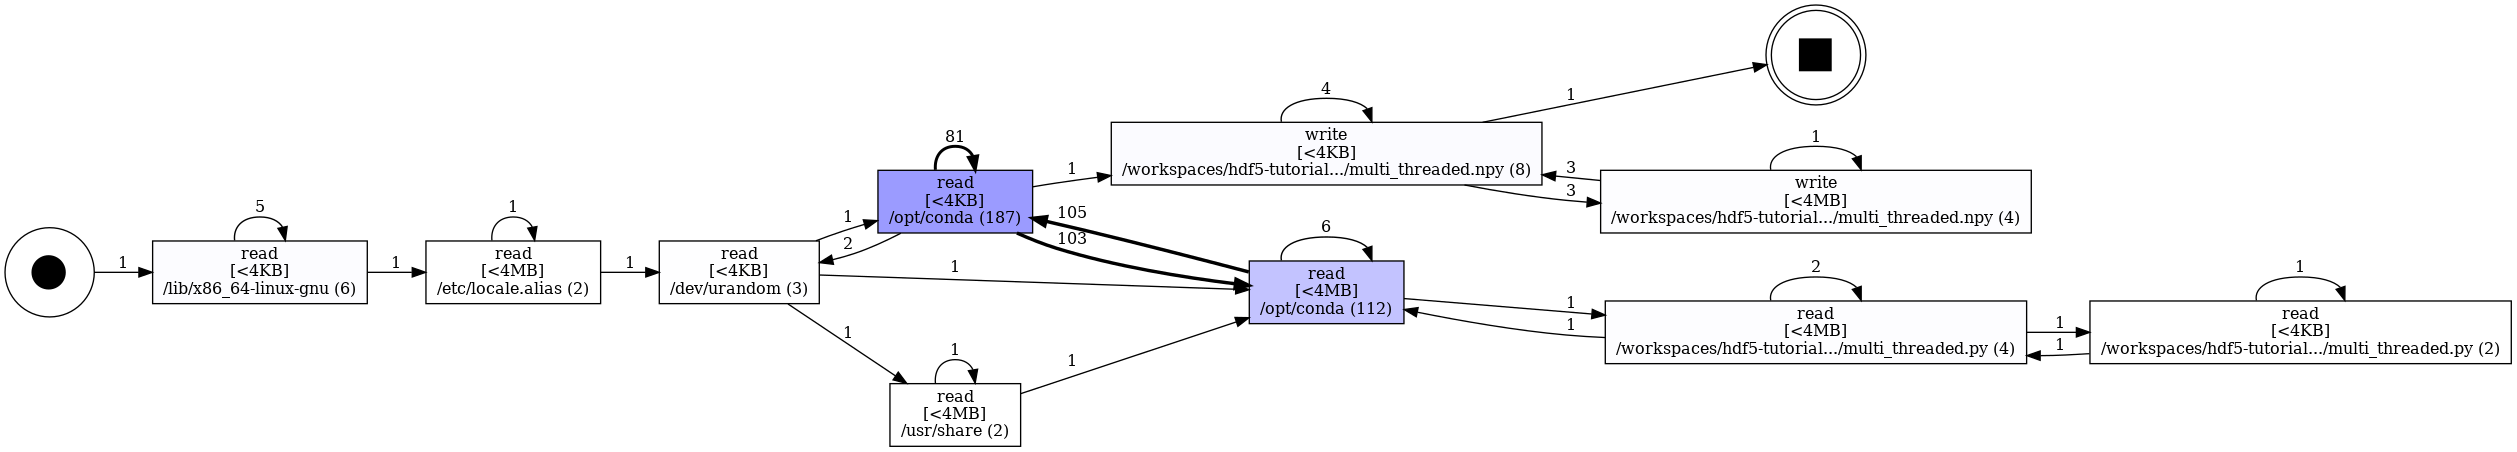

In [28]:
sta.view_dfg()

#### Arbitrary Command

In [6]:
!strace -f -tt -T -r -y -o logs/cmd.st lscpu


Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      39 bits physical, 48 bits virtual
CPU(s):                             16
On-line CPU(s) list:                0-15
Thread(s) per core:                 2
Core(s) per socket:                 8
Socket(s):                          1
Vendor ID:                          GenuineIntel
CPU family:                         6
Model:                              154
Model name:                         12th Gen Intel(R) Core(TM) i7-1260P
Stepping:                           3
CPU MHz:                            2496.011
BogoMIPS:                           4992.02
Virtualization:                     VT-x
Hypervisor vendor:                  Microsoft
Virtualization type:                full
L1d cache:                          384 KiB
L1i cache:                          256 KiB
L2 cache:                           10 MiB
L3 cach

In [7]:
io_calls = ['read','write']
line_reader = IOLineReaderV3(collapse=False)
sta = IOMinerV3(["logs/cmd.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/cmd.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


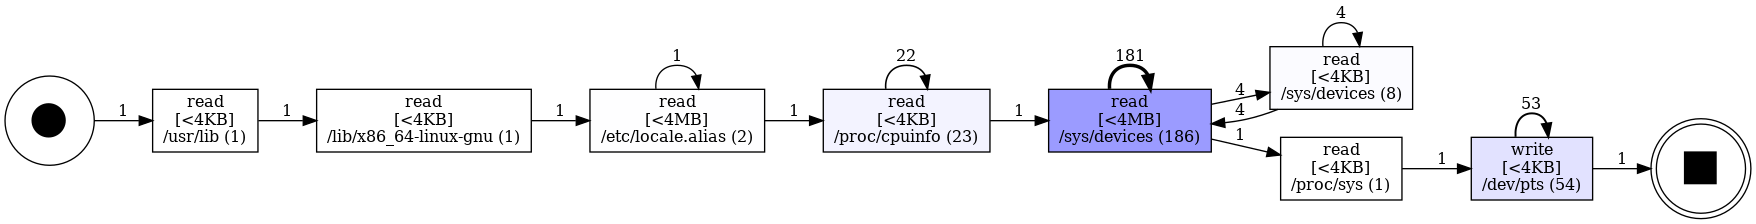

In [8]:
sta.view_dfg()

In [9]:
sta.activities_summary['cmd']

,call,duration,percent
0,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000027,0.016322
1,"[read, [<4KB], /proc/cpuinfo]",0.001255,0.758693
2,"[read, [<4KB], /proc/sys]",0.000033,0.019950
3,"[read, [<4KB], /sys/devices]",0.000254,0.153552
4,"[read, [<4KB], /usr/lib]",0.000052,0.031436
5,"[read, [<4MB], /etc/locale.alias]",0.000308,0.186197
6,"[read, [<4MB], /sys/devices]",0.008841,5.344707
7,"[write, [<4KB], /dev/pts]",0.004624,2.795377


In [12]:
%%bash
strace -f -tt -y -r -T ls

19:03:52.267492 (+     0.000000) execve("/bin/ls", ["ls"], 0x7ffdec61b018 /* 59 vars */) = 0 <0.000370>
19:03:52.268187 (+     0.000648) brk(NULL) = 0x555654b8e000 <0.000072>
19:03:52.268424 (+     0.000212) access("/etc/ld.so.preload", R_OK) = -1 ENOENT (No such file or directory) <0.000071>
19:03:52.268638 (+     0.000212) openat(AT_FDCWD, "/etc/ld.so.cache", O_RDONLY|O_CLOEXEC) = 3</etc/ld.so.cache> <0.000094>
19:03:52.268919 (+     0.000282) fstat(3</etc/ld.so.cache>, {st_mode=S_IFREG|0644, st_size=39386, ...}) = 0 <0.000076>
19:03:52.269114 (+     0.000190) mmap(NULL, 39386, PROT_READ, MAP_PRIVATE, 3</etc/ld.so.cache>, 0) = 0x7ff402da9000 <0.000094>
19:03:52.269322 (+     0.000213) close(3</etc/ld.so.cache>) = 0 <0.000074>
19:03:52.269506 (+     0.000181) openat(AT_FDCWD, "/lib/x86_64-linux-gnu/libselinux.so.1", O_RDONLY|O_CLOEXEC) = 3</lib/x86_64-linux-gnu/libselinux.so.1> <0.000088>
19:03:52.269713 (+     0.000206) read(3</lib/x86_64-linux-gnu/libselinux.so.1>, "\177ELF\2\1\1\0\

-e
00-prepare-eg.ipynb
01-core-view1.ipynb
01A-devCore-LineReader.ipynb
01B-devCore-Preprocessor.ipynb
01C-devCore-StraceAnalyzer.ipynb
02-dev-View1.ipynb
02-test-view1.ipynb
03-dev-View2.ipynb
03-test-view2.ipynb
03-view2.ipynb
04-dev-view3.ipynb
04-test-view3.ipynb
05-view3.ipynb
data
logs
src
